https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/tree/master

## 單詞嵌入(word embeddings)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
keras.__version__

'2.10.0'

In [2]:
from keras.layers import Embedding

# 嵌入層( Embedding layer)的構建至少需要兩個參數：
# 可能的符標(token)的數量，這裡是 1000(1 + maximum word index),
# 和嵌入(embedding)的維度，這裡是 64。

embedding_layer = Embedding(1000, 64)

### 文本準備 x_train, x_test, y_train, y_test

In [18]:
from keras.datasets import imdb
# from keras import preprocessing
from keras_preprocessing import sequence
# 要考慮作為特徵的單詞數
max_features = 10000

# 在此單詞數量之後剪切文本
maxlen = 20

# 將數據加載為整數列表
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 確認資料長度
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")
print(len(x_train[0]), '第一筆評論長度')
print(x_train[0])


# 這將我們的整數列表變成一個2D整個張量 (samples, maxlen)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # 不夠長的補'0', 太長的裁剪掉
x_test = sequence.pad_sequences(x_test, maxlen=maxlen) # 不夠長的補'0', 太長的裁剪掉
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)


25000 train sequences
25000 test sequences
218 第一筆評論長度
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
x_tra

In [16]:
print(x_train.shape)
print(x_test.shape)

(25000, 20)
(25000, 20)


### 詞嵌入 word embedding & 情緒分析

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

# 我們為嵌入層指定最大輸入長度，以便稍後將嵌入式輸入平坦化
# 參數：
#      符標(token)的數量，這裡是 10000
#      嵌入(embedding)的維度，這裡是 8
# model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))
model.add(Embedding(10000, 8, input_length=maxlen))

# 在嵌入層之後，我們的張量形狀轉換成為 `(samples, maxlen, 8)`.

# 我們將3D嵌入張量變成2D張量形狀 `(samples, maxlen * 8)`
model.add(Flatten())

# 我們添加一個二元分類層
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 0.6705 - acc: 0.6176 - val_loss: 0.6205 - val_acc: 0.7016
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5429 - acc: 0.7472 - val_loss: 0.5269 - val_acc: 0.7302
Epoch 3/10
625/625 [==============================] 

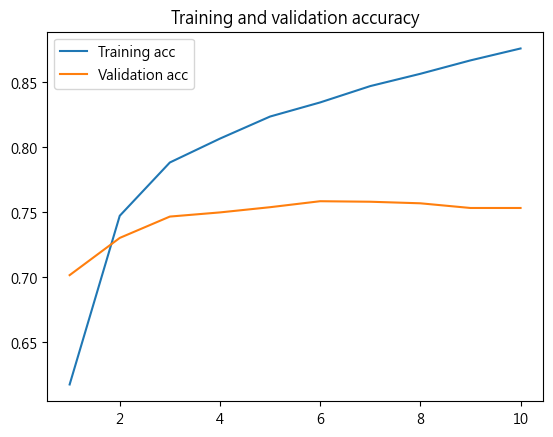

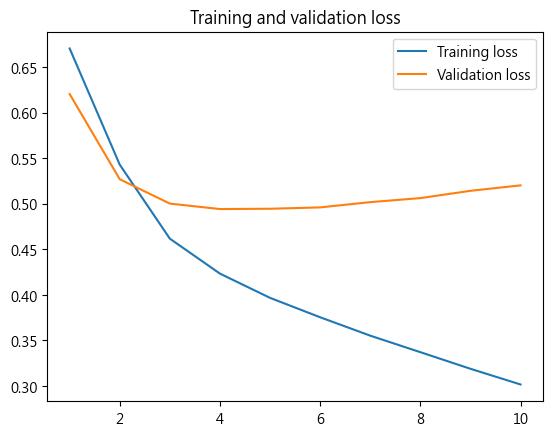

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()